# Into

The purpos of the nesdis_gml_synergy package is to collect all the data processing that is done on the NESDIS satellite products in the context of the NESDIS-GML-synergy project. The package provide functions for opening satellite data files and generating instances that contain usefull methods that are either common to all satellite products, e.g. plotting, finding datapoints closes or around sites,etc. Other instances provide methods tailored to the particular data product, e.g. plot_true_color for the MCMIP product.

You will notice that I make use of the atmPy library below. This is not necessary but can be quite convenient.

# Downloading data

Downloading data is done using the nesdis_aws library, for details check out https://github.com/hagne/nesdis_aws (there is a similar example notebook like this one). There are examples below of the general usage of nesdis_aws.

# Imports

In [ ]:
import pathlib as pl
import nesdis_aws
import nesdis_gml_synergy.satlab as ngs
import atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad.surfrad as surfrad

In [88]:
plt.rcParams['figure.dpi'] = 200

# Development

In [ ]:
* define a list of radii
* get a mean, median and std and mad ... do it unbiased!!! 

# Products

## Land surface temperatur

land surface temperature product ('ABI-L2-LST') has a time resolution of 1 houre and a spacial resolution of: ~3.5x2.5 km (depending on location ... see below)

### download some data

In [144]:
reload(nesdis_aws.nesdis_aws)
reload(nesdis_aws)

<module 'nesdis_aws' from '/mnt/telg/prog/nesdis_aws/nesdis_aws/__init__.py'>

In [138]:
query = nesdis_aws.AwsQuery(path2folder_local='/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_LST/',
                            satellite='16',
                            product='ABI-L2-LST',
                            scan_sector='C',
                            start='2020-09-30 12:00:00',
                            end='2020-09-30 13:00:00',
                            no_of_days=None,
                            last_x_days=None,
                            max_no_of_files=100)

In [139]:
print(query.info_on_current_query())

no of files: 1
estimated disk usage: 2 mb
remaining disk space after download: 48 %



In [140]:
query.download()

[None]

### open

In [300]:
lst = ngs.open_file('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_LST/OR_ABI-L2-LSTC-M6_G16_s20202741201163_e20202741203536_c20202741204383.nc')

### Plot on map

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:472: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  bmap.pcolormesh(lons, lats, self.ds[variable], latlon=True, **pcolor_kwargs)


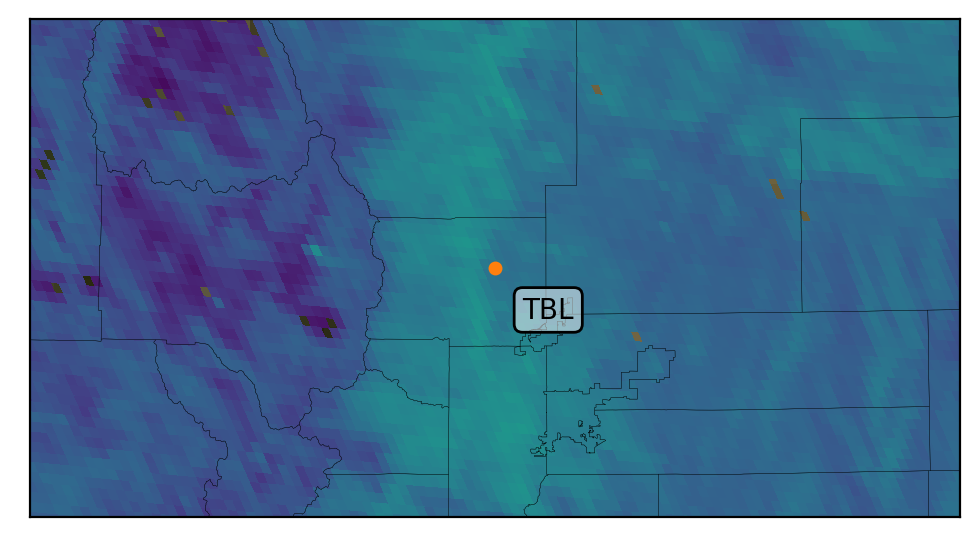

In [303]:
scale = 0.1
width=2800000 *scale
height=1500000 * scale
a, bmap = surfrad.network.stations.Table_Mountain.plot(width=width, height=height)
lst.plot('LST', bmap = bmap)
bmap.drawcounties()

## Cloud and Moisture Imagery (MCMIP)

so far I am using this product to make pretty pictures. BTW, there is a SatelliteMovie class in this package to make dayly movies. Will add it to this notebook at some point ... if you are really eager to see how it works, bug me 

### open

In [343]:
reload(ngs)

<module 'nesdis_gml_synergy.satlab' from '/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py'>

In [344]:
mcmip = ngs.open_file('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI-L2-MCMIP/OR_ABI-L2-MCMIPC-M6_G16_s20202561501157_e20202561503536_c20202561504090.nc')

{}

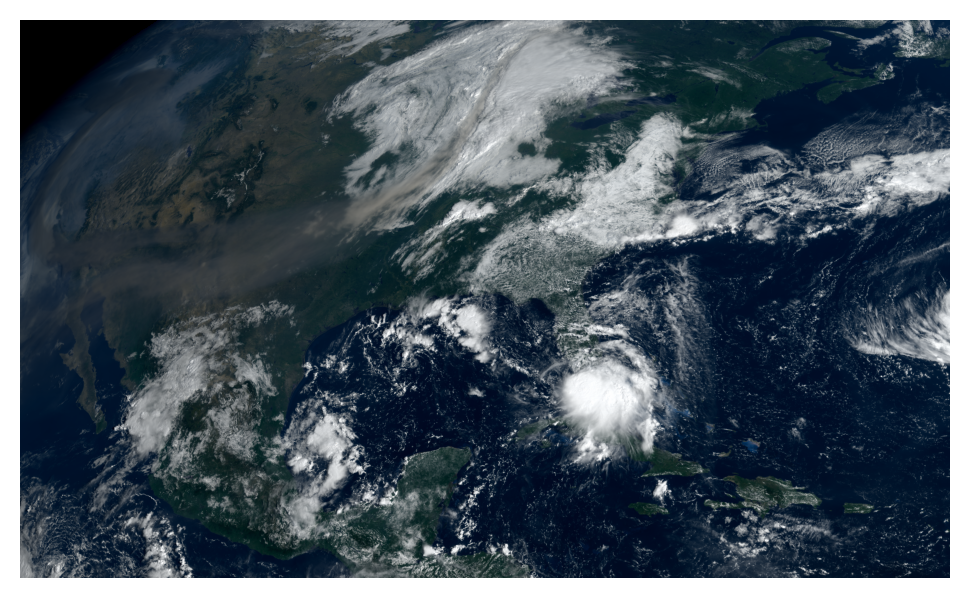

In [345]:
mcmip.plot_true_color()

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:560: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  out['pc'] = pc


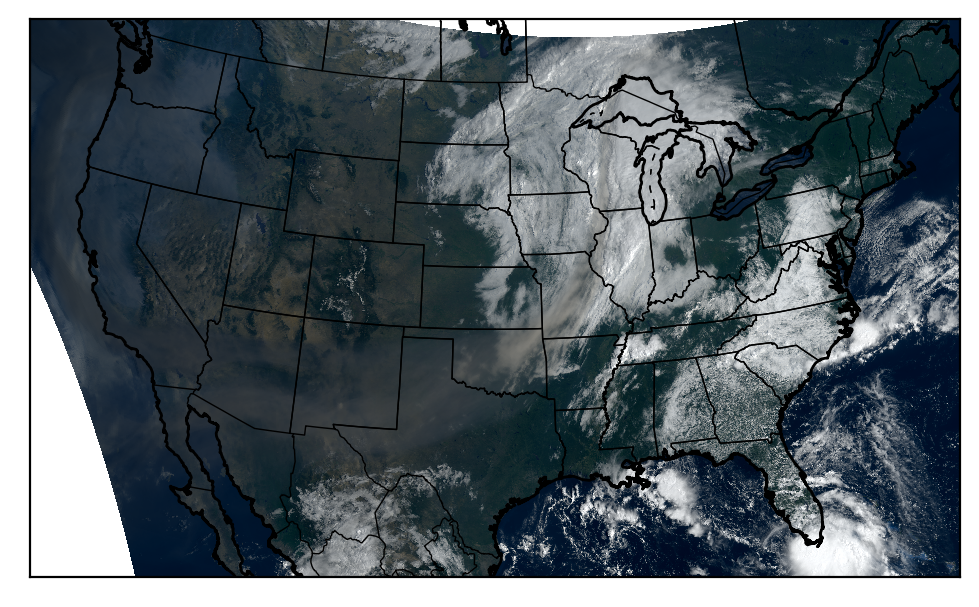

In [346]:
out = mcmip.plot_true_color(projection='aea', 
#                       bmap = bmap, 
                      zorder = 0)

### resolution

In [305]:
lst.get_resolution(surfrad.network.stations.Table_Mountain)

,lon,lat
0,3.452556,2.67319


## AOD

In [89]:
p2f = pl.Path('/mnt/telg/data/smoke_events/20200912_18_CO/goes_raw/ABI_L2_AODC_M6_G16/OR_ABI-L2-AODC-M6_G16_s20202571501154_e20202571503527_c20202571506226.nc')
sat_aod = ngs.open_class_file(p2f)

In [90]:
sat_aod.ds

<xarray.Dataset>
Dimensions:                                                 (land_sensor_bands: 3, latitude_bands: 18, num_area_types: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_latitude_band_bounds: 2, number_of_sunglint_angle_bounds: 2, number_of_time_bounds: 2, sea_sensor_bands: 4, x: 2500, y: 1500)
Coordinates:
    t                                                       datetime64[ns] ...
  * y                                                       (y) float32 0.128...
  * x                                                       (x) float32 -0.10...
    y_image                                                 float32 ...
    x_image                                                 float32 ...
    sunglint_angle                                          float32 ...
    retrieval_local_zenith_angle                            float32 ...
    quantitative_local_zenith_angle                         float32 ...
    retrieval_solar_zenith_angle                            float32 ...
    quantitative_solar_zenith_angle                         float32 ...
    aod_product_wavelength                                  float32 ...
  * latitude_bands                                          (latitude_bands) float32 ...
Dimensions without coordinates: land_sensor_bands, num_area_types, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_latitude_band_bounds, number_of_sunglint_angle_bounds, number_of_time_bounds, sea_sensor_bands
Data variables:
    AOD                                                     (y, x) float32 ...
    DQF                                                     (y, x) float32 ...
    AE1                                                     (y, x) float32 ...
    AE2                                                     (y, x) float32 ...
    AE_DQF                                                  (y, x) float32 ...
    time_bounds                                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                                  int32 ...
    y_image_bounds                                          (number_of_image_bounds) float32 ...
    x_image_bounds                                          (number_of_image_bounds) float32 ...
    nominal_satellite_subpoint_lat                          float32 ...
    nominal_satellite_subpoint_lon                          float32 ...
    nominal_satellite_height                                float32 ...
    geospatial_lat_lon_extent                               float32 ...
    sunglint_angle_bounds                                   (number_of_sunglint_angle_bounds) float32 ...
    retrieval_local_zenith_angle_bounds                     (number_of_LZA_bounds) float32 ...
    quantitative_local_zenith_angle_bounds                  (number_of_LZA_bounds) float32 ...
    retrieval_solar_zenith_angle_bounds                     (number_of_SZA_bounds) float32 ...
    quantitative_solar_zenith_angle_bounds                  (number_of_SZA_bounds) float32 ...
    land_sensor_band_wavelengths                            (land_sensor_bands) float32 ...
    sea_sensor_band_wavelengths                             (sea_sensor_bands) float32 ...
    land_sensor_band_ids                                    (land_sensor_bands) uint8 ...
    sea_sensor_band_ids                                     (sea_sensor_bands) uint8 ...
    latitude_band_bounds                                    (latitude_bands, number_of_latitude_band_bounds) float32 ...
    snow_free_land_and_ice_free_sea                         (num_area_types) |S14 ...
    goes_lat_lon_projection                                 int32 ...
    aod550_retrievals_attempted_land                        float64 ...
    aod550_retrievals_attempted_sea                         float64 ...
    aod550_good_LZA_retrievals_attempted                    float64 ...
    aod550_outlier_pixel_count                              float64 ...
    min_ao

/mnt/telg/prog/nesdis_gml_synergy/nesdis_gml_synergy/satlab.py:408: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  bmap.pcolormesh(lons, lats, self.ds[param], latlon=True, zorder = 0)


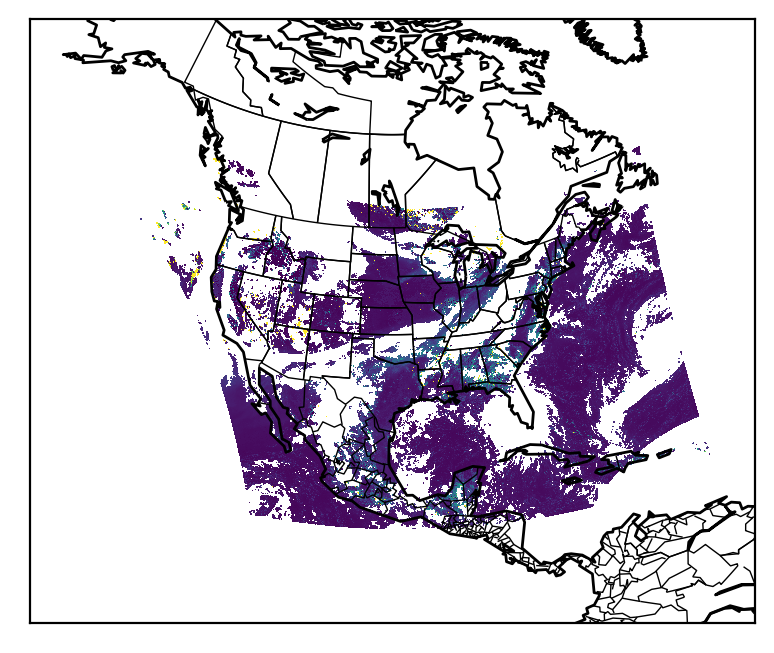

In [91]:
sat_aod.plot('AOD')